<a href="https://colab.research.google.com/github/ZScyan/CobraLab/blob/main/biomat/Expresi%C3%B3n_Gen%C3%A9tica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

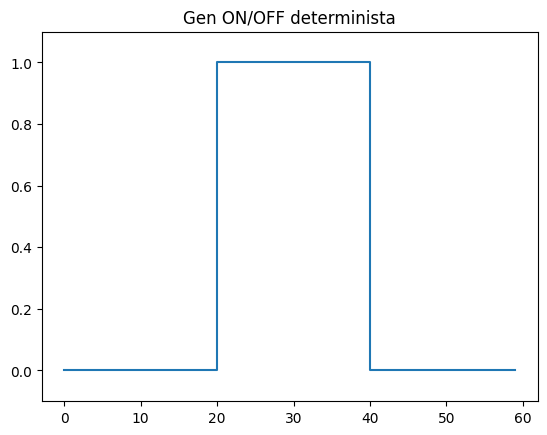

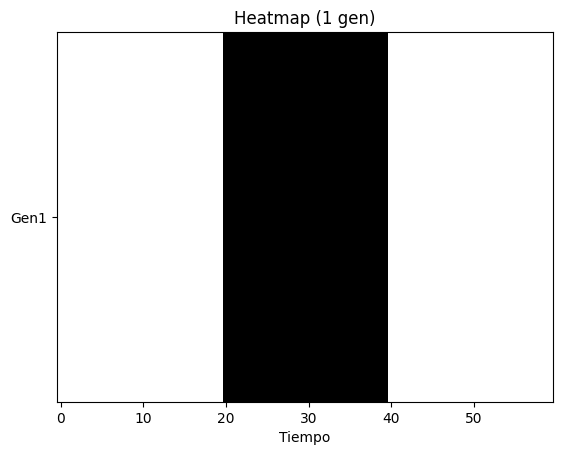

In [1]:
import numpy as np, matplotlib.pyplot as plt

T = 60
x = np.zeros(T,dtype=int)
x[20:40] = 1  # pulso determinista

plt.figure();
plt.step(range(T),x,where="post"); plt.ylim(-0.1,1.1)
plt.title("Gen ON/OFF determinista"); plt.show()

plt.imshow(x.reshape(1,-1),aspect="auto",cmap="Greys",vmin=0,vmax=1)
plt.yticks([0],["Gen1"]); plt.xlabel("Tiempo")
plt.title("Heatmap (1 gen)"); plt.show()


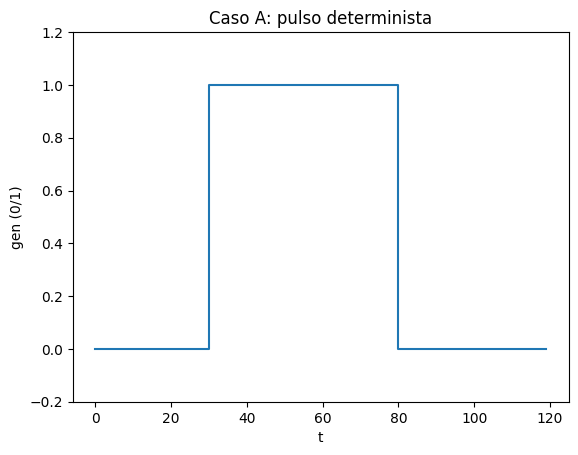

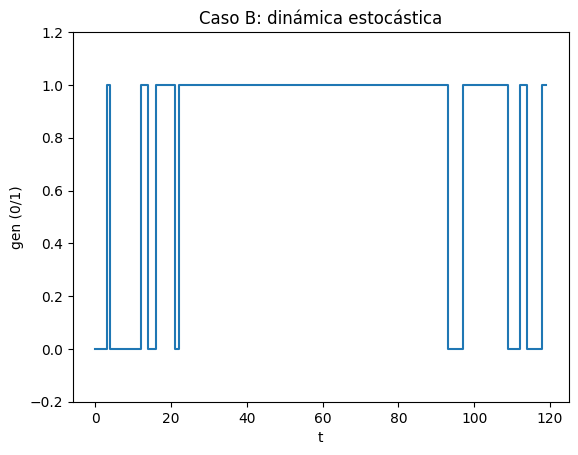

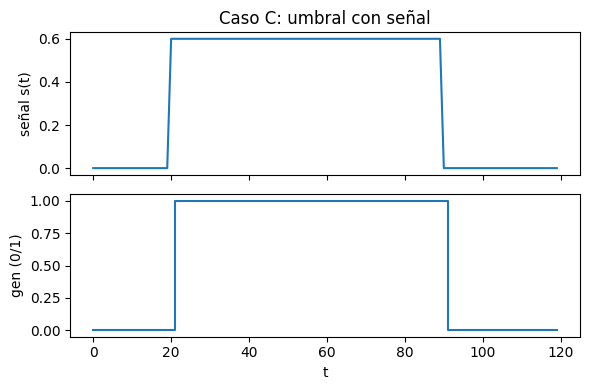

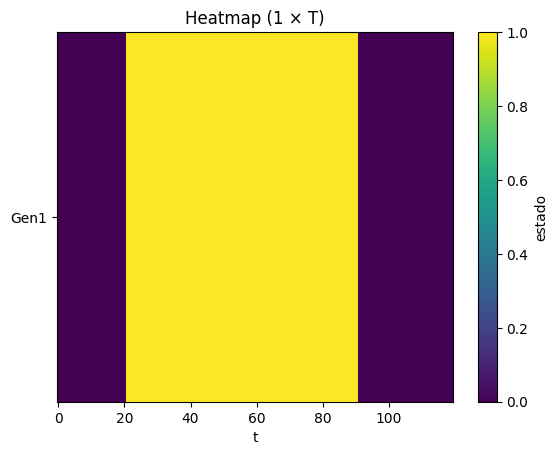

In [2]:
import numpy as np
import matplotlib.pyplot as plt

T = 120  # pasos de tiempo

# --------- A) Determinista: pulso ----------
x = np.zeros(T, dtype=int)
t_on, t_off = 30, 80
x[t_on:t_off] = 1

plt.figure()
plt.step(range(T), x, where='post')
plt.ylim(-0.2, 1.2); plt.xlabel('t'); plt.ylabel('gen (0/1)')
plt.title('Caso A: pulso determinista'); plt.show()

# --------- B) Estocástico: p_on / p_off ----------
rng = np.random.default_rng(0)
p_on, p_off = 0.2, 0.05
x = np.zeros(T, dtype=int)
x[0] = 0
for t in range(T-1):
    if x[t]==0:
        x[t+1] = 1 if rng.random()<p_on  else 0
    else:
        x[t+1] = 0 if rng.random()<p_off else 1

plt.figure()
plt.step(range(T), x, where='post')
plt.ylim(-0.2, 1.2); plt.xlabel('t'); plt.ylabel('gen (0/1)')
plt.title('Caso B: dinámica estocástica'); plt.show()

# --------- C) Umbral con señal externa ----------
T = 120
s = np.zeros(T); s[20:90] = 0.6  # “concentración” de señal
w, theta = 1.0, 0.5
x = np.zeros(T, dtype=int)
for t in range(T-1):
    x[t+1] = 1 if (w*s[t] >= theta) else 0

fig, axs = plt.subplots(2, 1, figsize=(6,4), sharex=True)
axs[0].plot(range(T), s); axs[0].set_ylabel('señal s(t)')
axs[1].step(range(T), x, where='post'); axs[1].set_ylabel('gen (0/1)'); axs[1].set_xlabel('t')
axs[0].set_title('Caso C: umbral con señal'); plt.tight_layout(); plt.show()

# --------- Heatmap 1xT (visualización que escalaremos a N genes) ----------
import matplotlib.pyplot as plt
Z = x.reshape(1,-1)  # 1 fila, T columnas
plt.figure()
plt.imshow(Z, aspect='auto', vmin=0, vmax=1)
plt.yticks([0], ['Gen1']); plt.xlabel('t'); plt.title('Heatmap (1 × T)')
plt.colorbar(label='estado'); plt.show()
